In [14]:
import pandas as bd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = bd.read_csv('C:\\customer_acquisition_cost_dataset.csv')

In [51]:
df

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers
0,CUST0001,Email Marketing,3489.027844,16
1,CUST0002,Online Ads,1107.865808,33
2,CUST0003,Social Media,2576.081025,44
3,CUST0004,Online Ads,3257.567932,32
4,CUST0005,Email Marketing,1108.408185,13
...,...,...,...,...
495,CUST0496,Email Marketing,1130.865147,19
496,CUST0497,Social Media,2482.119835,18
497,CUST0498,Online Ads,2773.532344,12
498,CUST0499,Social Media,4802.220679,28


# Checking data

In [5]:
#Let’s have a look at the column insights before moving forward:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [6]:
df.describe()

,Marketing_Spend,New_Customers
count,500.000000,500.000000
mean,3094.726549,30.070000
std,1136.628605,11.754209
min,1010.702890,10.000000
25%,2131.835093,19.000000
50%,3155.976673,31.000000
75%,4027.494116,40.000000
max,4999.631314,50.000000


In [52]:
df.isnull().sum()

Customer_ID          0
Marketing_Channel    0
Marketing_Spend      0
New_Customers        0
dtype: int64

In [53]:
df.duplicated().sum()

0

# Now, let’s calculate the customer acquisition cost:

In [7]:
df['cac'] = df['Marketing_Spend'] / df['New_Customers']

In [8]:
df

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,cac
0,CUST0001,Email Marketing,3489.027844,16,218.064240
1,CUST0002,Online Ads,1107.865808,33,33.571691
2,CUST0003,Social Media,2576.081025,44,58.547296
3,CUST0004,Online Ads,3257.567932,32,101.798998
4,CUST0005,Email Marketing,1108.408185,13,85.262168
...,...,...,...,...,...
495,CUST0496,Email Marketing,1130.865147,19,59.519218
496,CUST0497,Social Media,2482.119835,18,137.895546
497,CUST0498,Online Ads,2773.532344,12,231.127695
498,CUST0499,Social Media,4802.220679,28,171.507881


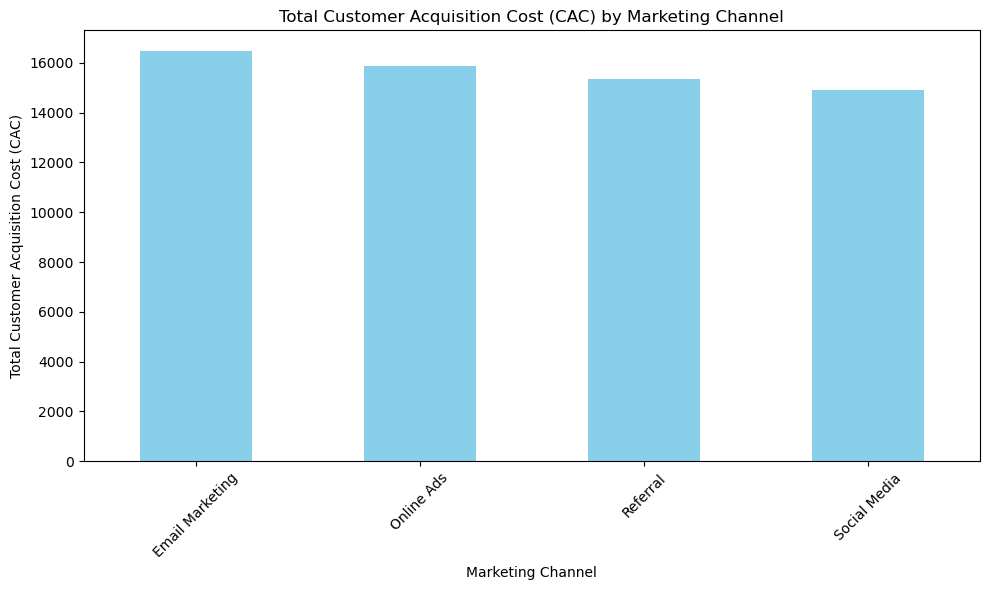

In [16]:
#Now, let’s have a look at the CAC by marketing channels:

sum_cac = df.groupby('Marketing_Channel')['cac'].sum()


plt.figure(figsize=(10, 6))
sum_cac.plot(kind='bar', color='skyblue')
plt.title('Total Customer Acquisition Cost (CAC) by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Total Customer Acquisition Cost (CAC)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### So, the customer acquisition cost of Email marketing is the highest and social media is the lowest. Now, let’s have a look at the relationship between new customers acquired and CAC:

In [21]:
df

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,cac
0,CUST0001,Email Marketing,3489.027844,16,218.064240
1,CUST0002,Online Ads,1107.865808,33,33.571691
2,CUST0003,Social Media,2576.081025,44,58.547296
3,CUST0004,Online Ads,3257.567932,32,101.798998
4,CUST0005,Email Marketing,1108.408185,13,85.262168
...,...,...,...,...,...
495,CUST0496,Email Marketing,1130.865147,19,59.519218
496,CUST0497,Social Media,2482.119835,18,137.895546
497,CUST0498,Online Ads,2773.532344,12,231.127695
498,CUST0499,Social Media,4802.220679,28,171.507881


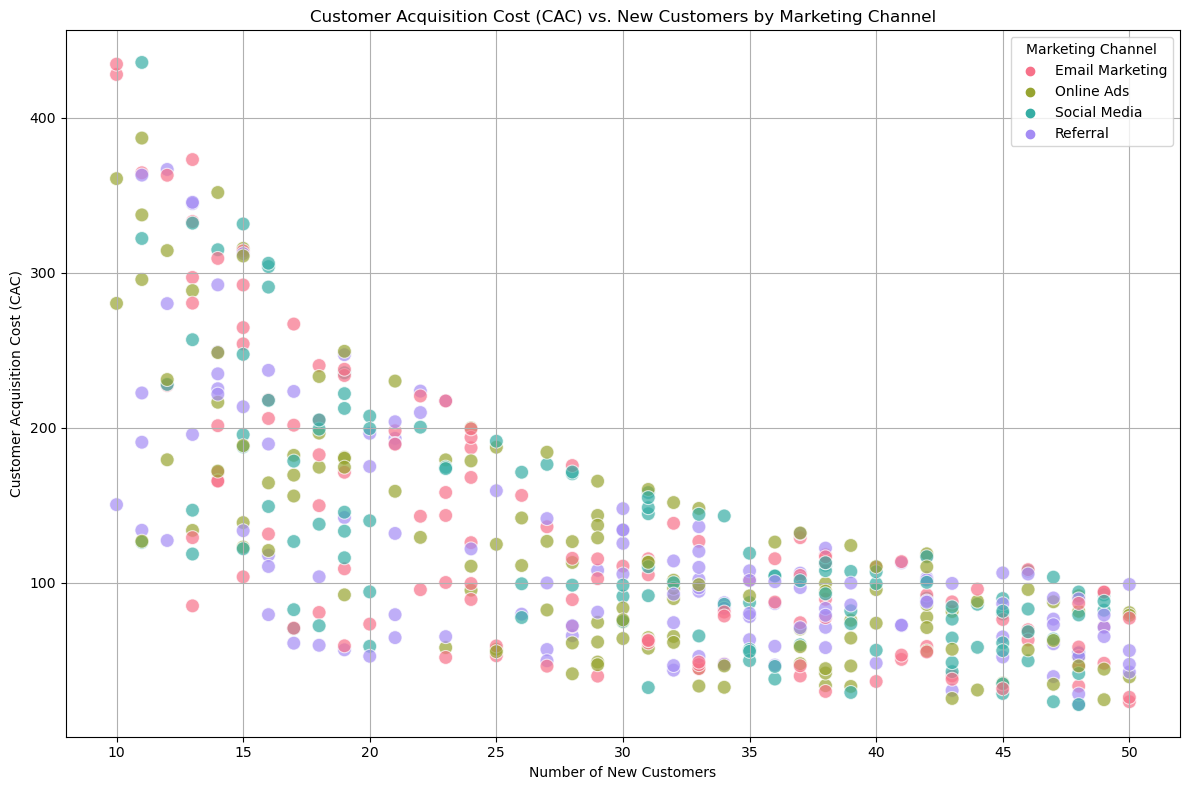

In [35]:
palette = sns.color_palette('husl', len(df['Marketing_Channel'].unique()))

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='New_Customers',
    y='cac',
    hue='Marketing_Channel',
    data=df,
    palette=palette,
    alpha=0.7,
    edgecolor='w',
    s=100
)
plt.title('Customer Acquisition Cost (CAC) vs. New Customers by Marketing Channel')
plt.xlabel('Number of New Customers')
plt.ylabel('Customer Acquisition Cost (CAC)')
plt.legend(title='Marketing Channel')
plt.grid(True)
plt.tight_layout()
plt.show()

### So, the negative slope of the trendline in the above graph suggests that there is a tendency for channels with a higher number of new customers to have a lower CAC. In other words, as marketing efforts become more effective in acquiring customers, the cost per customer tends to decrease.

In [41]:
df1 = df.groupby('Marketing_Channel')['New_Customers'].sum().reset_index()

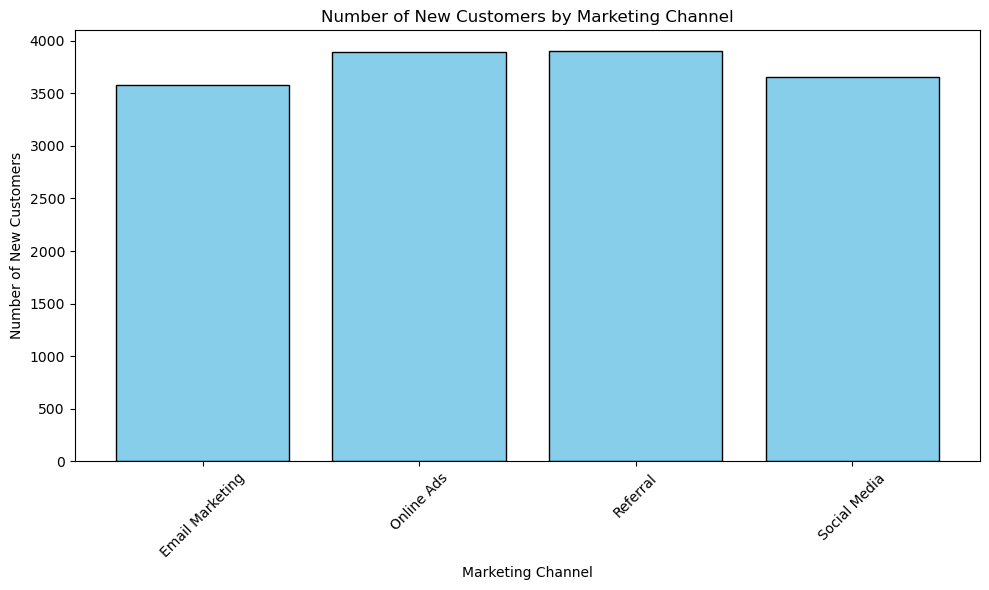

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(df1['Marketing_Channel'], df1['New_Customers'], color='skyblue', edgecolor='black')
plt.title('Number of New Customers by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()